<a href="https://colab.research.google.com/github/violet417/violet417/blob/main/2MD%EA%B8%B0%EC%B4%88_08_K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8_%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### K 최근접 이웃 회귀
- 새로운 값에 대해서 가장 가까운 데이터 k개를 평균 낸 값으로 새로운 값을 예측
- 어떤 데이터를 보고 수치를 예측



In [ ]:
import pandas as pd
# 생선의 길이를 보고 무게 맞추기
perch = pd.read_csv('perch.csv')
perch

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


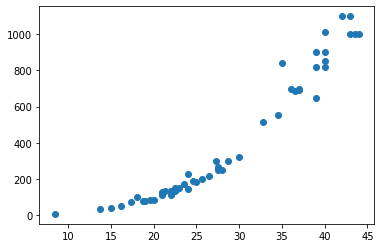

In [ ]:
import matplotlib.pyplot as plt
# 생선의 길이가 길어질수록 무게가 커짐
plt.scatter(perch['length'], perch['weight'])    

In [ ]:
data = perch['length'].to_numpy()
target = perch['weight'].to_numpy()

In [ ]:
data    # 문제집 // 2차원 행렬이어야 하는데, 1차원 행렬

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [ ]:
target   # 1차원 행렬

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [ ]:
data2 = data.reshape(-1, 1)    # -1: 자동행 / 자동행 1열로 바꿔라
data2

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [ ]:
from sklearn.model_selection import train_test_split
# 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(data2, target)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor  # K 최근접 이웃 회귀모델

knn = KNeighborsRegressor()
knn.fit(train_input, train_target)
knn.score(test_input, test_target)

0.9327283114838333

In [ ]:
test_target    # 실제값

array([ 70. ,  78. , 840. , 320. , 180. ,  32. , 265. ,   5.9, 145. ,
       100. , 188. , 260. , 125. , 130. ])

In [ ]:
knn.predict(test_input)    # 예측값

array([ 68.3,  95. , 666.2, 322.8, 191. ,  68.3, 263.6,  68.3, 133. ,
        68.3, 177.4, 263.6, 115. , 133. ])

In [ ]:
len(train_input)

42

In [ ]:
# 최상의 모델 찾기 (최적의 이웃수 찾기)

from sklearn.neighbors import KNeighborsRegressor # K 최근접 이웃 회귀모델
# 모델 생성
for n in range(1, 43): 
    knn = KNeighborsRegressor(n_neighbors=n)    # 이웃 설정
    knn.fit(train_input, train_target)
    score = knn.score(test_input, test_target)
    print("이웃수:{} / 정밀도:{}".format(n, score)) # 회귀에서는 정밀도로 표현

이웃수:1 / 정밀도:0.8445479928992609
이웃수:2 / 정밀도:0.909922318676165
이웃수:3 / 정밀도:0.9198688999375244
이웃수:4 / 정밀도:0.9258098643452867
이웃수:5 / 정밀도:0.9327283114838333
이웃수:6 / 정밀도:0.9132793909747844
이웃수:7 / 정밀도:0.9312123711753674
이웃수:8 / 정밀도:0.9267545943913096
이웃수:9 / 정밀도:0.932587513865422
이웃수:10 / 정밀도:0.9355153881660713
이웃수:11 / 정밀도:0.9445012643722558
이웃수:12 / 정밀도:0.9514244005065997
이웃수:13 / 정밀도:0.9525021162027836
이웃수:14 / 정밀도:0.9325657041070878
이웃수:15 / 정밀도:0.9150412109868857
이웃수:16 / 정밀도:0.9186474524824861
이웃수:17 / 정밀도:0.9030938122569075
이웃수:18 / 정밀도:0.883798890766676
이웃수:19 / 정밀도:0.8885488584307224
이웃수:20 / 정밀도:0.8912672753267141
이웃수:21 / 정밀도:0.8933096572649392
이웃수:22 / 정밀도:0.8704589100449877
이웃수:23 / 정밀도:0.8689168005046972
이웃수:24 / 정밀도:0.8451841928035504
이웃수:25 / 정밀도:0.8090142858433177
이웃수:26 / 정밀도:0.7634540448158632
이웃수:27 / 정밀도:0.694607937510645
이웃수:28 / 정밀도:0.6172150269492784
이웃수:29 / 정밀도:0.5282998021822021
이웃수:30 / 정밀도:0.4351271981052782
이웃수:31 / 정밀도:0.3377594532634046
이웃수:32 / 정밀도:0.211595

In [ ]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=13)

In [ ]:
test_target

array([ 70. ,  78. , 840. , 320. , 180. ,  32. , 265. ,   5.9, 145. ,
       100. , 188. , 260. , 125. , 130. ])

In [ ]:
knn.predict(test_input)

array([100.88461538, 100.88461538, 753.84615385, 346.92307692,
       185.        , 100.88461538, 229.15384615, 100.88461538,
       139.23076923, 100.88461538, 166.92307692, 229.15384615,
       116.92307692, 139.23076923])

In [ ]:
knn.score(test_input, test_target)

0.9525021162027836

In [ ]:
import numpy as np
# 실제값 - 예측값 / 음수가 있으므로 절대값을 씌워줌 
np.mean(abs(test_target - knn.predict(test_input))) 
# 모델이 실제값에 있어서 31g정도는 차이가 있을 수 있다. 

31.960439560439564